<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#GPU" data-toc-modified-id="GPU-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GPU</a></span></li><li><span><a href="#CPU" data-toc-modified-id="CPU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CPU</a></span></li></ul></li></ul></div>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Functions

In [42]:
def plot_time(df, hardware, depth, time_steps):
    df = df[(df.depth == depth) & (df.time_steps == time_steps)]
    df = df.sort_values('time')
    sns.set(font_scale=2)
    f, ax = plt.subplots(1, 2, figsize=(40, 20))
    
    # Plot violin
    f.suptitle(f'Time per batch on {hardware} (depth: {depth}, time_steps:'
               f'{time_steps})')
    sns.violinplot(x='cell', y='time', data=df, hue='calc_type',
                   split=True, ax=ax[0])
    ax[0].set(ylabel='time(sec)', xlabel='RNN type')
    ax[0].set_xticklabels(ax [0].get_xticklabels(), rotation=55)
    
    #Plot bar
    sns.barplot(x='cell', y='time', hue='calc_type', data=df, ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=55)
    ax[1].set(ylabel='time (sec)', xlabel='RNN type')
    
    f.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plots

## GPU

In [58]:
gpu_df = pd.read_csv('./gpu_profile.csv')

In [59]:
set(gpu_df.depth), set(gpu_df.time_steps)

({10, 50}, {100, 200})

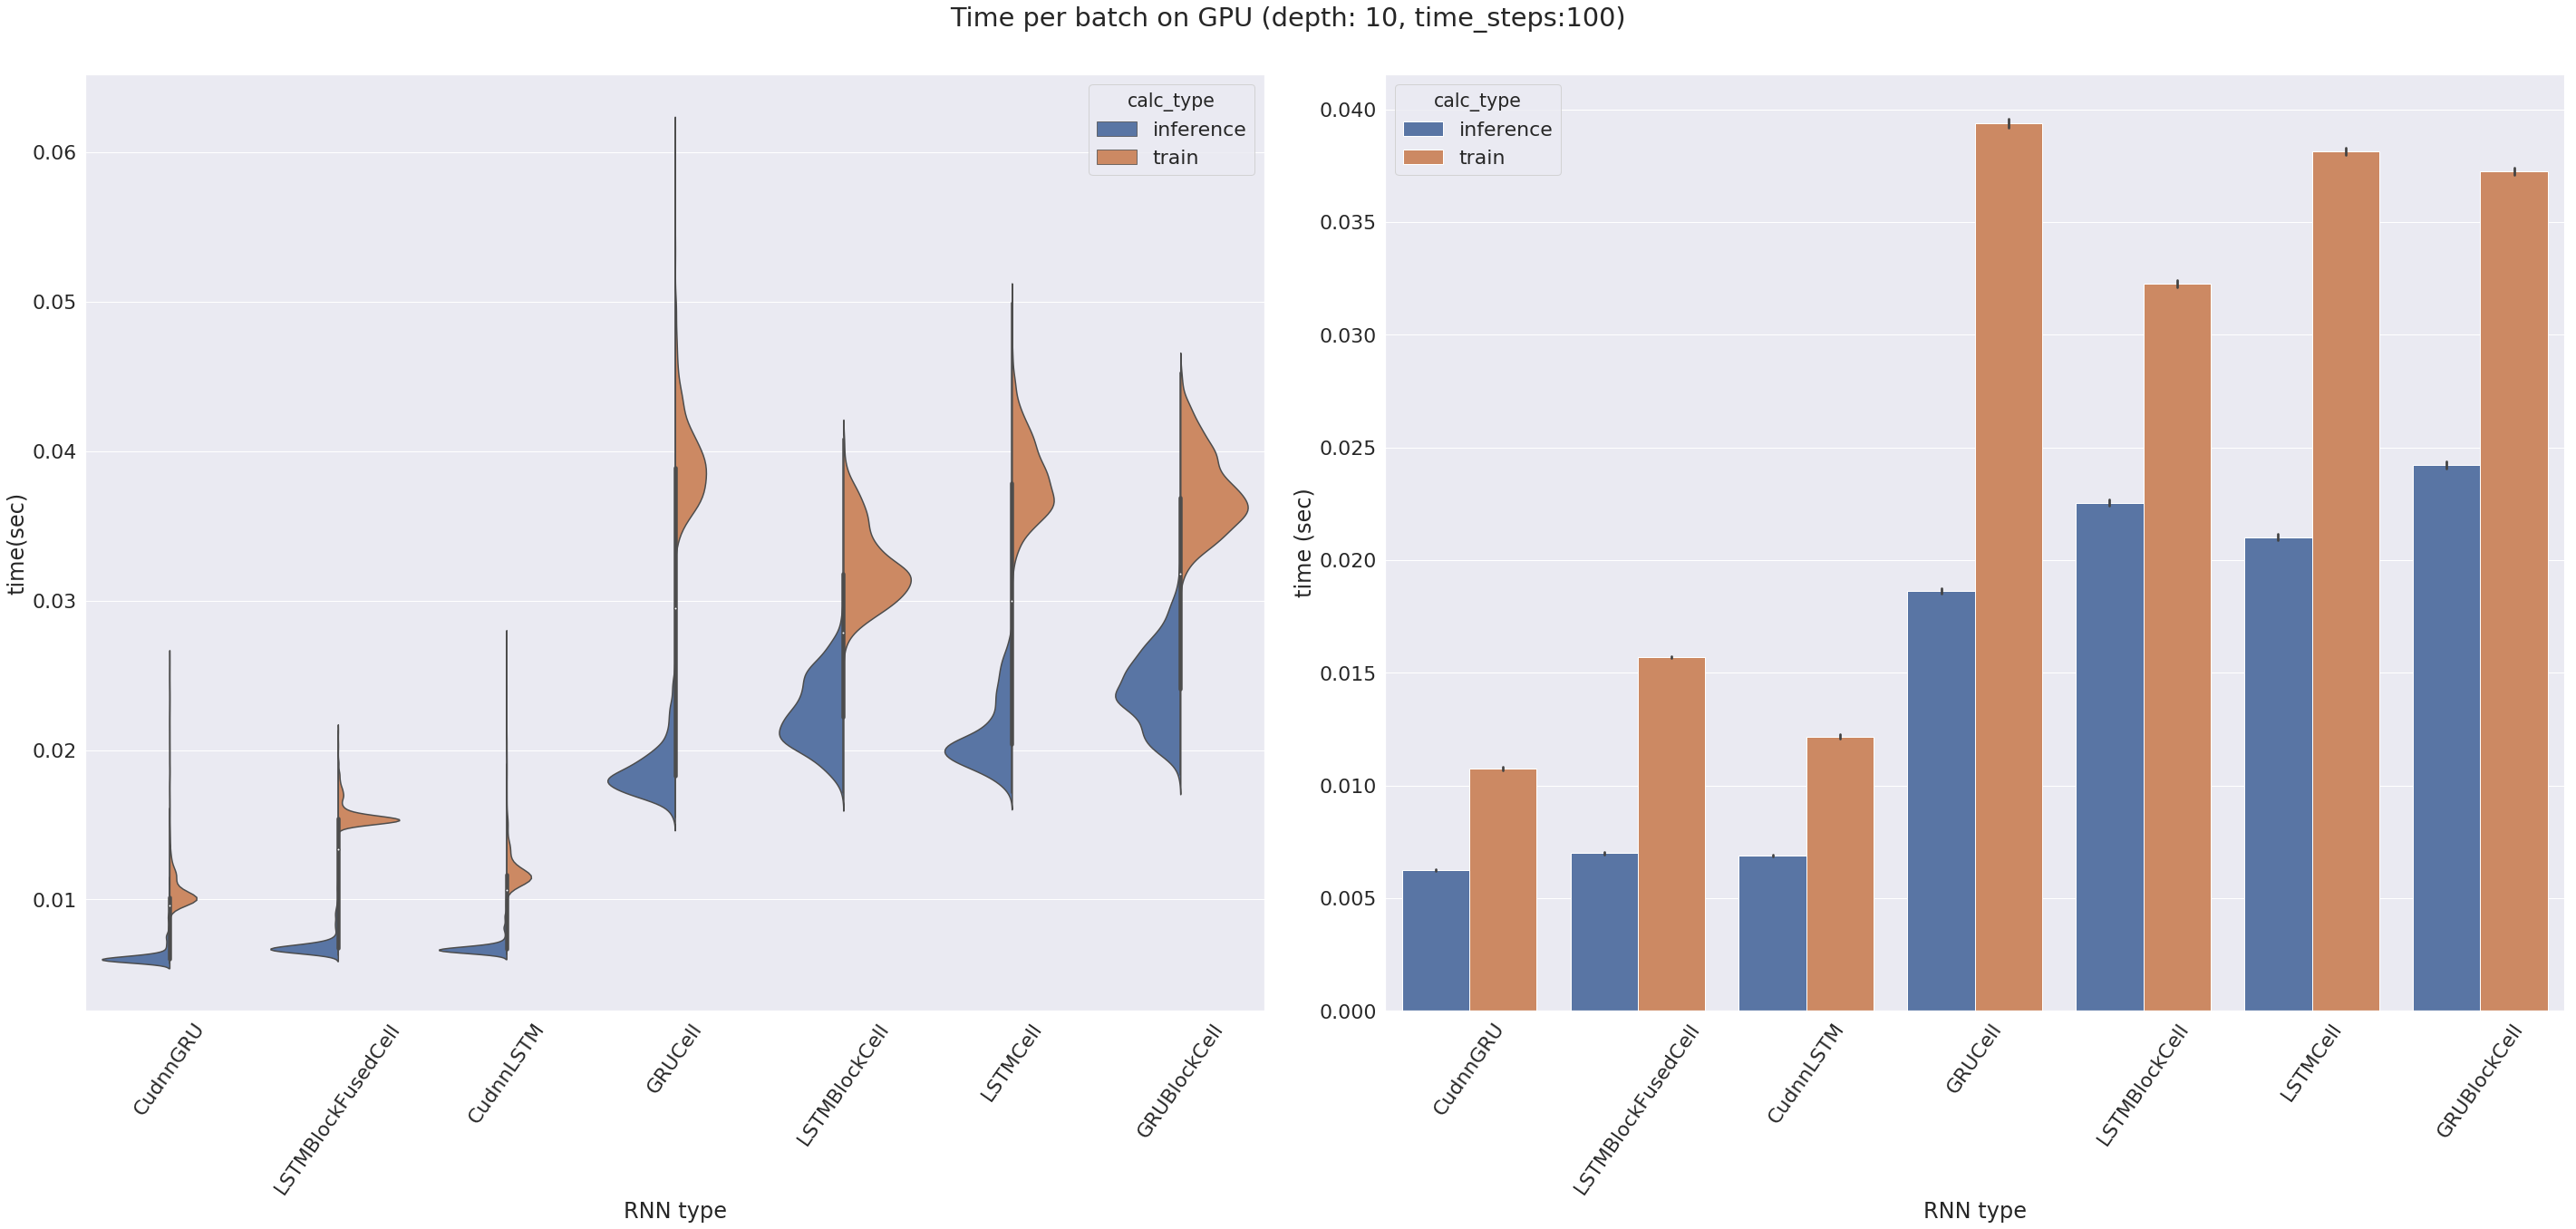

In [60]:
plot_time(gpu_df, 'GPU', 10, 100)

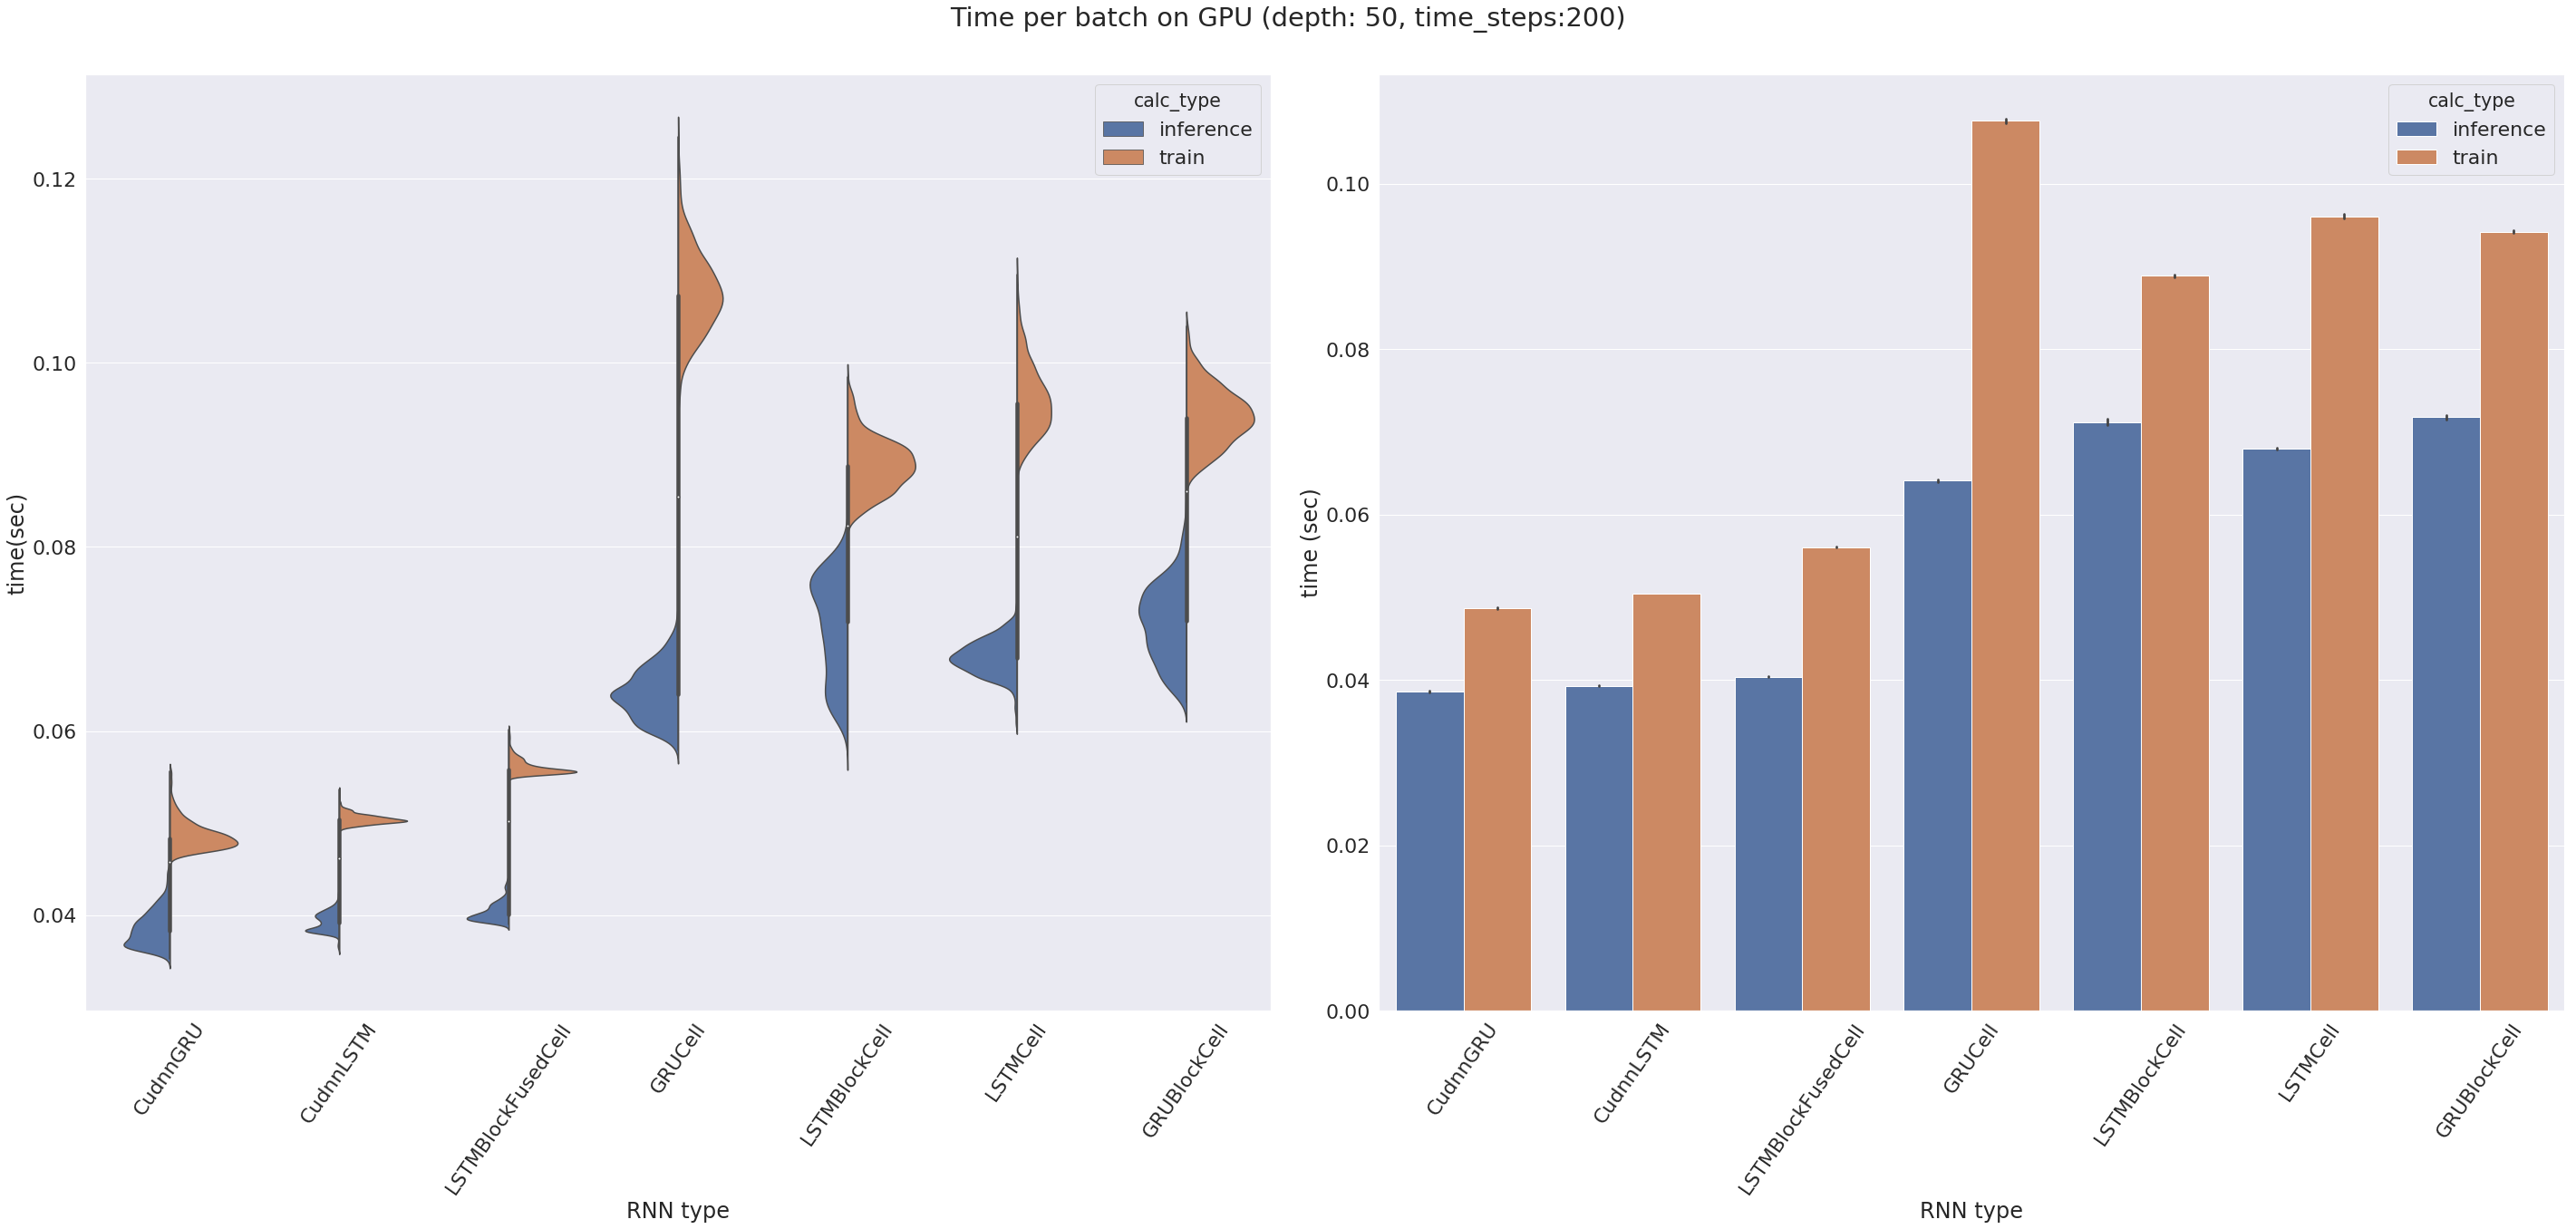

In [61]:
plot_time(gpu_df, 'GPU', 50, 200)

## CPU

In [62]:
cpu_df = pd.read_csv('./cpu_profile.csv')

In [63]:
set(gpu_df.depth), set(gpu_df.time_steps)

({10, 50}, {100, 200})

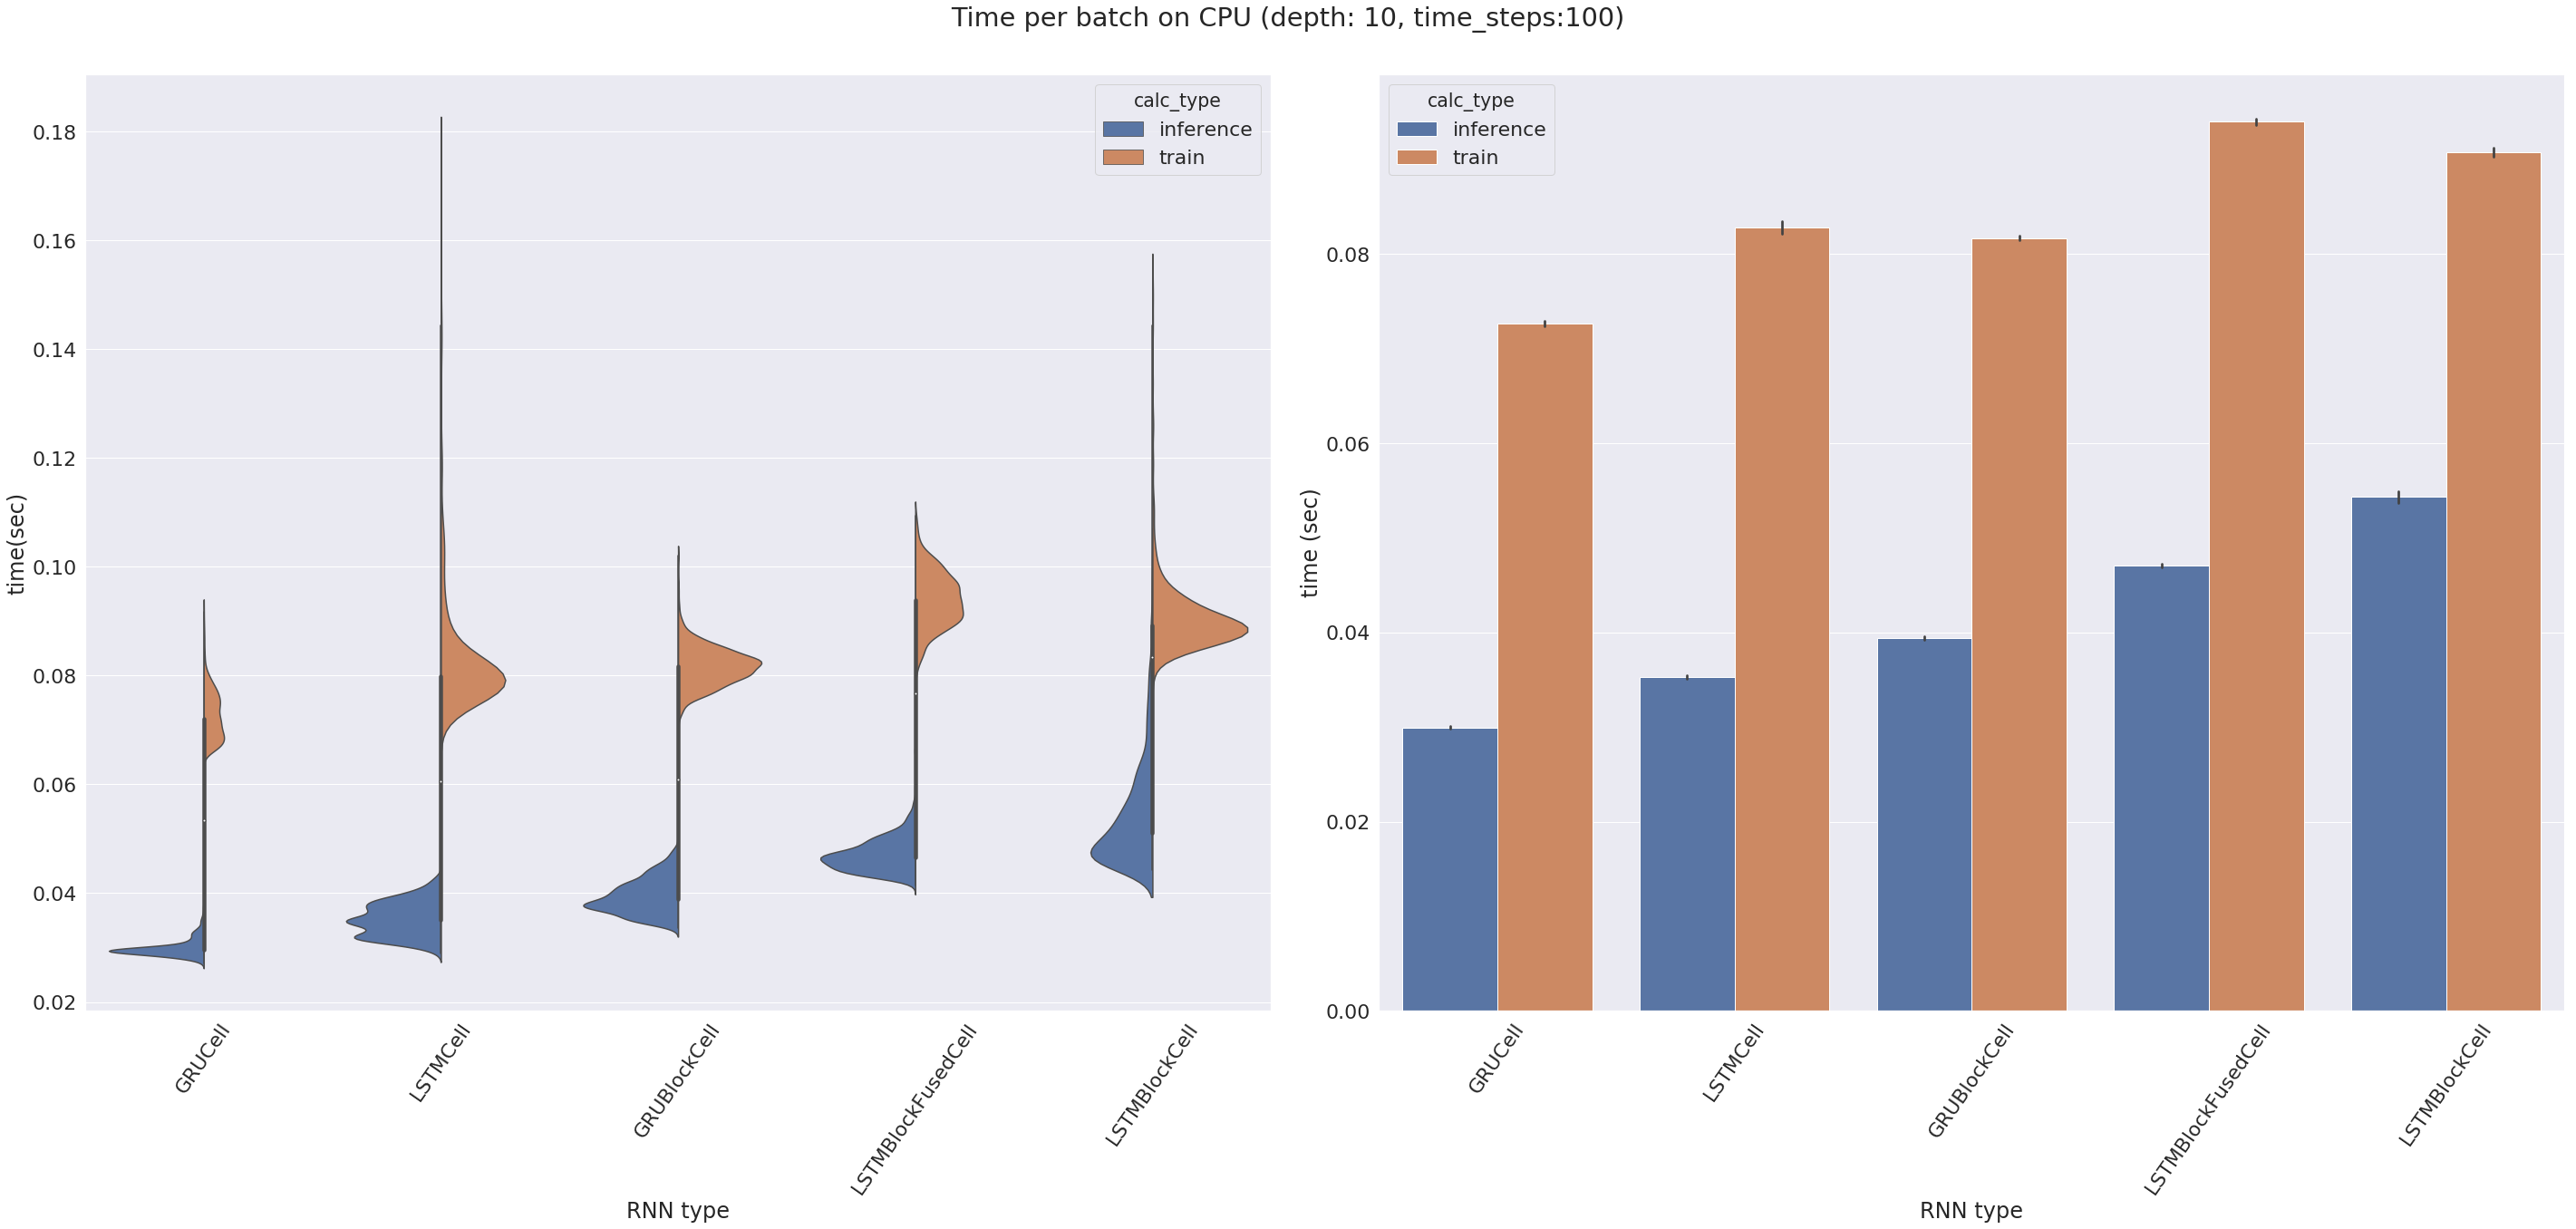

In [64]:
plot_time(cpu_df, 'CPU', 10, 100)

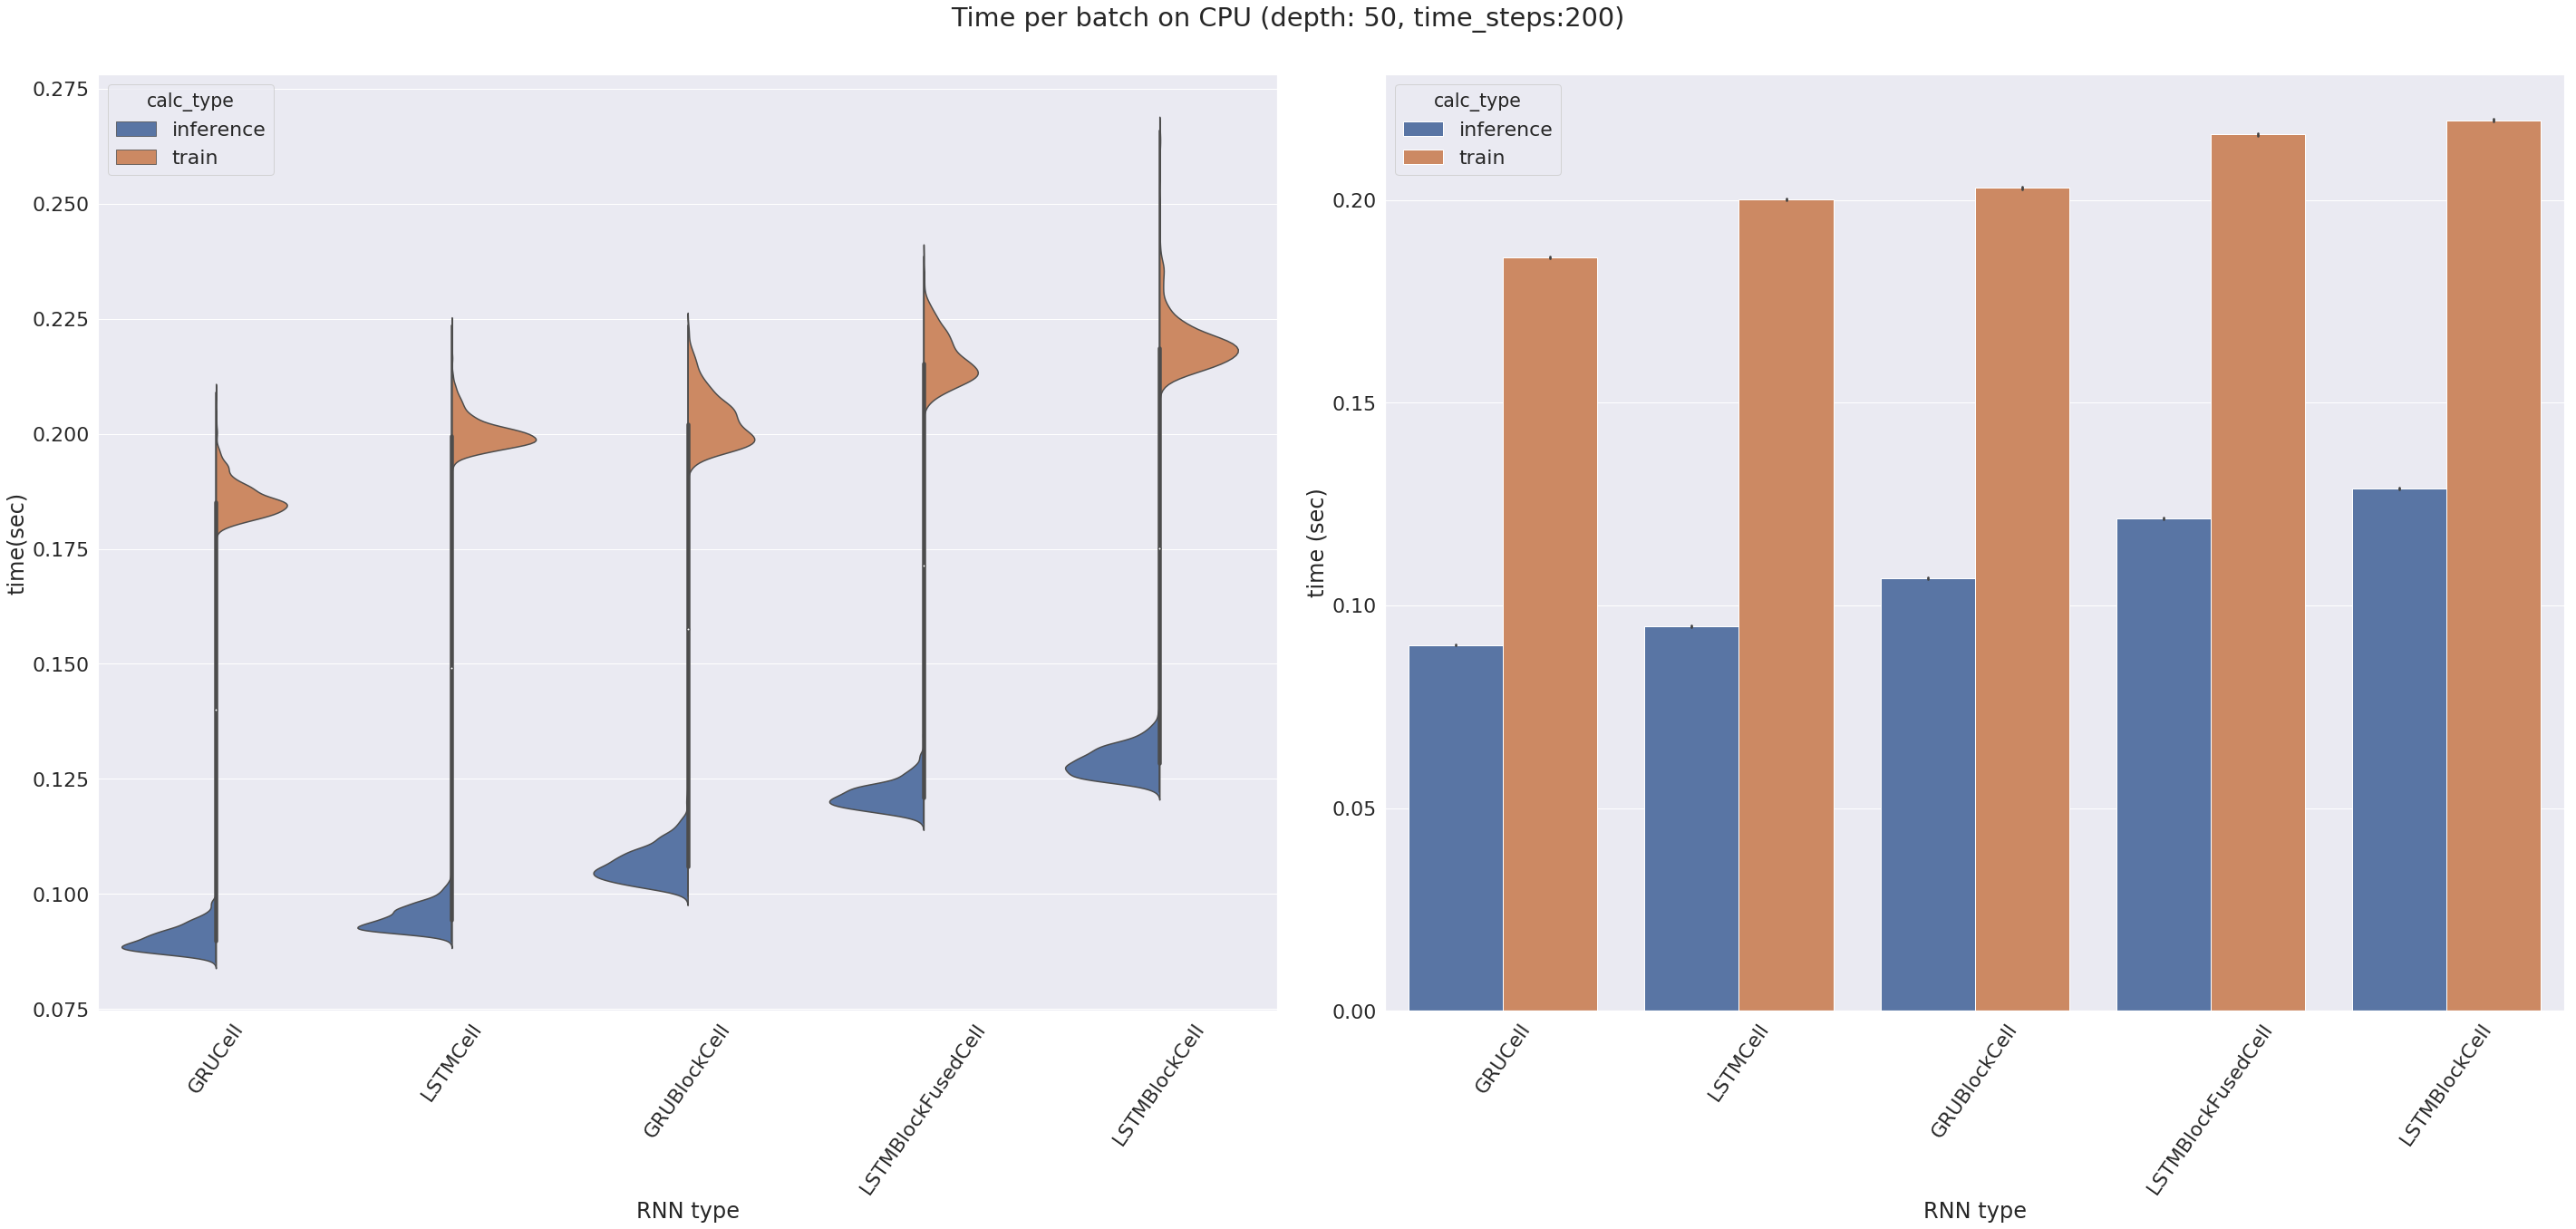

In [65]:
plot_time(cpu_df, 'CPU', 50, 200)